# Obesity Project Adolescents 

#### SHIP Adolescents Who Have Obesity 2010, 2013-2014, 2016, 2018, 2021 in Maryland

In [ ]:
# Load the data and store it in dataframe df:


In [1]:
!pip install requests




In [3]:
import requests

url = "https://opendata.maryland.gov/api/views/hedp-3fxm/rows.csv?accessType=DOWNLOAD"
r = requests.get(url)
with open("file.csv", "wb") as f:
    f.write(r.content)


In [7]:
# Importing libraries

In [5]:
import pandas as pd

In [7]:
import numpy as np

In [9]:
import matplotlib as plt

In [11]:
import seaborn as sns

In [13]:
# Reading Adolescents File

In [15]:
df = pd.read_csv(url)
df.head()

,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,12.6,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
1,Allegany,16.1,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
2,Anne Arundel,13.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
3,Baltimore City,19.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
4,Baltimore County,14.7,All races/ ethnicities (aggregated),2016,Adolescents with Obesity


In [ ]:
# Information about the Dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Jurisdiction     658 non-null    object 
 1   Value            551 non-null    float64
 2   Race/ ethnicity  658 non-null    object 
 3   Year             658 non-null    int64  
 4   Measure          658 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 25.8+ KB


In [30]:
# Searching for missing data

In [19]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

   Jurisdiction  Value  Race/ ethnicity   Year  Measure
0         False  False            False  False    False
1         False  False            False  False    False
2         False  False            False  False    False
3         False  False            False  False    False
4         False  False            False  False    False
Jurisdiction
Jurisdiction
False    658
Name: count, dtype: int64

Value
Value
False    551
True     107
Name: count, dtype: int64

Race/ ethnicity
Race/ ethnicity
False    658
Name: count, dtype: int64

Year
Year
False    658
Name: count, dtype: int64

Measure
Measure
False    658
Name: count, dtype: int64



In [15]:
# Now we need to clean the data and complete the NaN for the mean or frequency values

In [37]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(10)


,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,12.6,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
1,Allegany,16.1,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
2,Anne Arundel,13.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
3,Baltimore City,19.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
4,Baltimore County,14.7,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
5,Calvert,11.3,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
6,Caroline,16.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
7,Carroll,9.4,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
8,Cecil,16.3,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
9,Charles,13.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity


In [39]:
df.info

<bound method DataFrame.info of          Jurisdiction  Value                                Race/ ethnicity  \
0               State   12.6            All races/ ethnicities (aggregated)   
1            Allegany   16.1            All races/ ethnicities (aggregated)   
2        Anne Arundel   13.0            All races/ ethnicities (aggregated)   
3      Baltimore City   19.0            All races/ ethnicities (aggregated)   
4    Baltimore County   14.7            All races/ ethnicities (aggregated)   
..                ...    ...                                            ...   
653            Talbot   24.1  Black or African American Non-Hispanic/Latino   
654        Washington   18.8  Black or African American Non-Hispanic/Latino   
655          Wicomico   29.7  Black or African American Non-Hispanic/Latino   
656         Worcester   32.0  Black or African American Non-Hispanic/Latino   
657    Baltimore City   23.0  Black or African American Non-Hispanic/Latino   

     Year          

In [21]:
# Evaluating for missing data
missing_data = df.isnull()
missing_data.head(10)


,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [61]:
# Count missing values in each column

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 


Jurisdiction
Jurisdiction
False    658
Name: count, dtype: int64

Value
Value
False    551
True     107
Name: count, dtype: int64

Race/ ethnicity
Race/ ethnicity
False    658
Name: count, dtype: int64

Year
Year
False    658
Name: count, dtype: int64

Measure
Measure
False    658
Name: count, dtype: int64



In [65]:
# Calculate the mean value for the "Value" column 

Value = df["Value"].astype("float").mean(axis=0)
print("Average of Value:", Value)


Average of Value: 14.104718693284935


In [67]:
# Replace "NaN" with mean value in "Value" column
df["Value"].replace(np.nan, Value)

0      12.6
1      16.1
2      13.0
3      19.0
4      14.7
       ... 
653    24.1
654    18.8
655    29.7
656    32.0
657    23.0
Name: Value, Length: 658, dtype: float64

In [69]:
# To see which values are present in a particular column, we can use the ".value_counts()" method:

df['Value'].value_counts()


Value
9.6     9
12.9    9
11.1    8
14.8    8
18.8    8
       ..
11.2    1
7.2     1
7.3     1
4.1     1
23.0    1
Name: count, Length: 195, dtype: int64

In [87]:
# Drop all rows that do not have Value data:

# simply drop whole row with NaN in "Value" column
df.dropna(subset=["Value"], axis=0)


,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,12.6,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
1,Allegany,16.1,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
2,Anne Arundel,13.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
3,Baltimore City,19.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
4,Baltimore County,14.7,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
...,...,...,...,...,...
653,Talbot,24.1,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity
654,Washington,18.8,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity
655,Wicomico,29.7,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity
656,Worcester,32.0,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity


In [89]:
# Reset index, because we droped two rows
df.reset_index(drop=True)


,Jurisdiction,Value,Race/ ethnicity,Year,Measure
0,State,12.6,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
1,Allegany,16.1,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
2,Anne Arundel,13.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
3,Baltimore City,19.0,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
4,Baltimore County,14.7,All races/ ethnicities (aggregated),2016,Adolescents with Obesity
...,...,...,...,...,...
653,Talbot,24.1,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity
654,Washington,18.8,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity
655,Wicomico,29.7,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity
656,Worcester,32.0,Black or African American Non-Hispanic/Latino,2021,Adolescents with Obesity


In [91]:
df.info

<bound method DataFrame.info of          Jurisdiction  Value                                Race/ ethnicity  \
0               State   12.6            All races/ ethnicities (aggregated)   
1            Allegany   16.1            All races/ ethnicities (aggregated)   
2        Anne Arundel   13.0            All races/ ethnicities (aggregated)   
3      Baltimore City   19.0            All races/ ethnicities (aggregated)   
4    Baltimore County   14.7            All races/ ethnicities (aggregated)   
..                ...    ...                                            ...   
653            Talbot   24.1  Black or African American Non-Hispanic/Latino   
654        Washington   18.8  Black or African American Non-Hispanic/Latino   
655          Wicomico   29.7  Black or African American Non-Hispanic/Latino   
656         Worcester   32.0  Black or African American Non-Hispanic/Latino   
657    Baltimore City   23.0  Black or African American Non-Hispanic/Latino   

     Year          

In [95]:
# The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

df.dtypes 


Jurisdiction        object
Value              float64
Race/ ethnicity     object
Year                 int64
Measure             object
dtype: object

In [119]:
# Find the correlation between the following columns: Value, Year

df[["Value", "Year"]].corr()

,Value,Year
Value,1.000000,0.380072
Year,0.380072,1.000000


<Axes: xlabel='Year', ylabel='Value'>

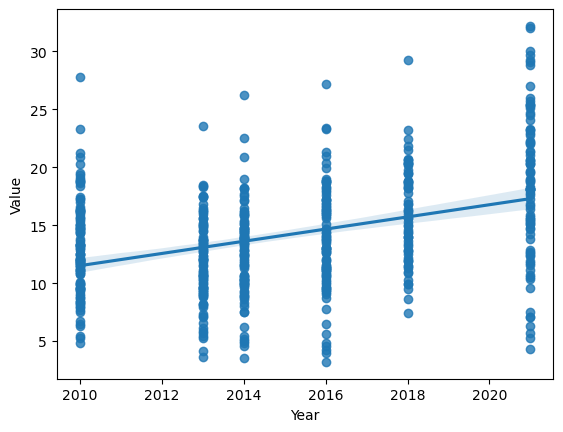

In [129]:
# Regression Plto to visualize the relationship between Value and Year.
sns.regplot(y='Value', x='Year', data=df)


<Axes: xlabel='Value', ylabel='Race/ ethnicity'>

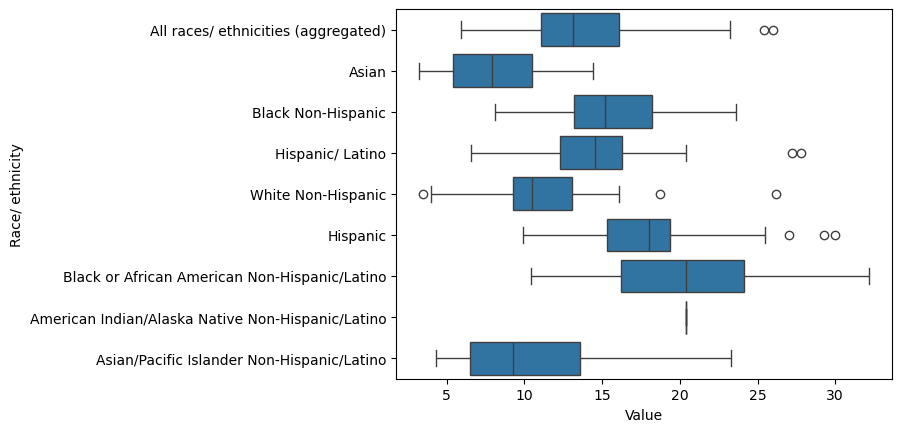

In [125]:
# Let's look at the relationship between Race/ ethnicity and "Value.
sns.boxplot(x="Value", y="Race/ ethnicity", data=df)


<Axes: xlabel='Value', ylabel='Jurisdiction'>

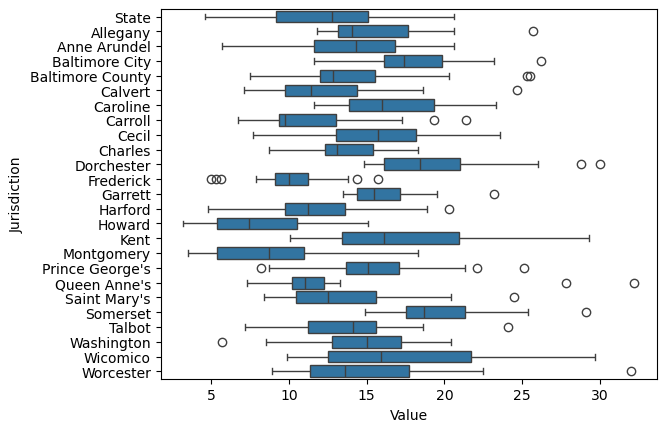

In [127]:
# Let's look at the relationship between Jurisdiction and "Value.
sns.boxplot(x="Value", y="Jurisdiction", data=df)

<Axes: xlabel='Year', ylabel='Race/ ethnicity'>

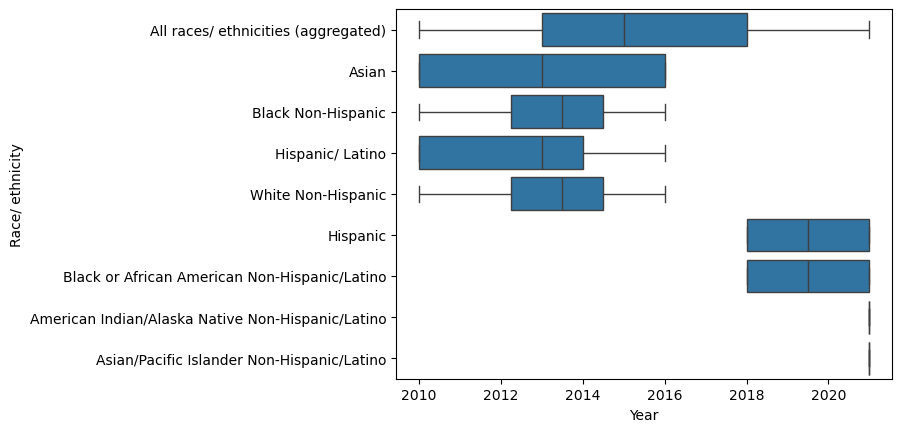

In [123]:
# Let's look at the relationship between Year and Race/ ethnicity.
sns.boxplot(x="Year", y="Race/ ethnicity", data=df)

In [115]:
df.describe()

,Value,Year
count,551.000000,658.000000
mean,14.104719,2015.220365
std,5.005220,3.685722
min,3.200000,2010.000000
25%,10.650000,2013.000000
50%,13.600000,2014.000000
75%,17.100000,2018.000000
max,32.200000,2021.000000


In [113]:
df.describe(include=['object'])

,Jurisdiction,Race/ ethnicity,Measure
count,658,658,658
unique,25,9,1
top,State,All races/ ethnicities (aggregated),Adolescents with Obesity
freq,28,150,658
